# Iris Dataset Neural Network Classification

A simple Iris Dataset classifier using PyTorch

## Import Required Libraries

In [1]:
# Data processing
import pandas as pd
import numpy as np

# PyTorch modules
import torch
import torch.nn as nn

# sklearn modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Visualizations
import matplotlib.pyplot as plt

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

RANDOM_STATE = 1

## Iris Dataset Cleaning and Processing

In [3]:
# Read dataset
iris_df = pd.read_csv('data/Iris.csv')

iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
# Brief EDA
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
# Brief EDA
print(f'Shape: {iris_df.shape}\n')
print(f'Null entries:\n{iris_df.isnull().sum()}')

Shape: (150, 6)

Null entries:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Remove ID column
iris_df.drop(['Id'], axis=1, inplace=True)

In [7]:
# All unique target variables
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Perform label encoding for target variables
encoding = {'Iris-setosa': 0,
            'Iris-versicolor': 1, 
            'Iris-virginica': 2}

iris_df['Species'] = iris_df['Species'].map(encoding)

iris_df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

# Create Training and Testing Dataset

In [9]:
# Predictor and target variables
X = iris_df.drop(['Species'], axis=1).values
y = iris_df['Species'].values

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_STATE)

In [11]:
# Scale predictor variables
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Converting from numpy to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Create Neural Network Model

In [18]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_input_size, hidden_output_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_input_size)
        self.hidden_layer1 = nn.Linear(hidden_input_size, hidden_output_size)
        self.output_layer = nn.Linear(hidden_output_size, num_classes)
        self.relu = nn.ReLU()
    
    
    def forward(self, x):
        out = self.relu(self.input_layer(x))
        out = self.relu(self.hidden_layer1(out))
        out = self.output_layer(out)
        return out

In [19]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica

input_size  = 4
hidden_input_size = 128
hidden_output_size = 64
num_classes = 3

model = NeuralNet(input_size, hidden_input_size, hidden_output_size, num_classes)

In [20]:
# Creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
num_epochs = 1000
learning_rate = 0.001

train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [26]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    print(outputs, y_train)
    
    # Calculate training loss
    loss_train = criterion(outputs, y_train)

    # Backward propagation: calculate gradients
    loss_train.backward()

    # Update the weights
    optimizer.step()
    
    # Clear out the gradients for the next step
    optimizer.zero_grad()

    # Predict test; Calculate test loss
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)

    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

tensor([[-3.9925e+01, -4.1573e+01,  7.8207e+01],
        [ 3.4737e+01,  1.9570e+01, -6.6818e+01],
        [ 3.7579e+01,  1.6269e+01, -6.5456e+01],
        [ 2.9030e+01,  1.0862e+01, -4.8125e+01],
        [-6.6655e+00,  1.0171e+01, -6.7758e+00],
        [ 3.3913e+01,  1.5738e+01, -6.0372e+01],
        [ 3.4482e+01,  1.8154e+01, -6.4427e+01],
        [-1.8442e+01,  7.9624e-02,  1.5161e+01],
        [-2.0376e+01, -1.1618e+01,  2.9628e+01],
        [-2.5789e+01, -2.1343e+01,  4.4649e+01],
        [-2.4704e+01, -1.7737e+01,  3.9698e+01],
        [-1.4221e+01, -2.8779e-01,  1.1972e+01],
        [-4.2298e-01,  1.4148e+01, -1.7299e+01],
        [-3.2716e+01, -3.1059e+01,  6.0981e+01],
        [-3.2876e-01,  1.3395e+01, -1.6375e+01],
        [ 3.4556e+01,  1.2600e+01, -5.7102e+01],
        [-2.0744e+01,  1.5947e-01,  1.6803e+01],
        [-1.5363e+01,  1.7340e-01,  1.2474e+01],
        [ 3.1130e+01,  1.1872e+01, -5.1829e+01],
        [ 3.3540e+01,  1.1087e+01, -5.3910e+01],
        [-2.4523e+01

        [ 3.1754e+01,  1.3217e+01, -5.4337e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-3.9961e+01, -4.1695e+01,  7.8355e+01],
        [ 3.4789e+01,  1.9592e+01, -6.6911e+01],
        [ 3.7634e+01,  1.6282e+01, -6.5540e+01],
        [ 2.9067e+01,  1.0858e+01, -4.8169e+01],
        [-6.6902e+00,  1.0183e+01, -6.7712e+00],
        [ 3.3962e+01,  1.5752e+01, -6.0449e+01],
        [ 3.4534e+01,  1.8171e+01, -6.4513e+01],
        [-1.8456e+01,  7.2593e-02,  1.5175e+01],
        [-2.0397e+01, -1.1662e+01,  2.9687e+01],
        [-2.5811e+01, -2.1405e+01,  4.4726e+01],
        [-2.4730e+01, -1.7799e+01,  3.9779e+01],
        [-1.4237e+01, -3.0146

        [ 3.1796e+01,  1.3221e+01, -5.4393e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-3.9994e+01, -4.1810e+01,  7.8495e+01],
        [ 3.4840e+01,  1.9613e+01, -6.7000e+01],
        [ 3.7687e+01,  1.6294e+01, -6.5620e+01],
        [ 2.9104e+01,  1.0856e+01, -4.8212e+01],
        [-6.7135e+00,  1.0194e+01, -6.7659e+00],
        [ 3.4009e+01,  1.5765e+01, -6.0523e+01],
        [ 3.4584e+01,  1.8187e+01, -6.4594e+01],
        [-1.8470e+01,  6.4755e-02,  1.5189e+01],
        [-2.0417e+01, -1.1704e+01,  2.9743e+01],
        [-2.5833e+01, -2.1464e+01,  4.4801e+01],
        [-2.4755e+01, -1.7858e+01,  3.9856e+01],
        [-1.4253e+01, -3.1435

tensor([[-4.0023e+01, -4.1910e+01,  7.8616e+01],
        [ 3.4884e+01,  1.9630e+01, -6.7075e+01],
        [ 3.7733e+01,  1.6305e+01, -6.5689e+01],
        [ 2.9137e+01,  1.0853e+01, -4.8249e+01],
        [-6.7340e+00,  1.0202e+01, -6.7600e+00],
        [ 3.4050e+01,  1.5777e+01, -6.0587e+01],
        [ 3.4628e+01,  1.8201e+01, -6.4663e+01],
        [-1.8482e+01,  5.7611e-02,  1.5203e+01],
        [-2.0435e+01, -1.1740e+01,  2.9792e+01],
        [-2.5851e+01, -2.1515e+01,  4.4865e+01],
        [-2.4776e+01, -1.7909e+01,  3.9922e+01],
        [-1.4266e+01, -3.2584e-01,  1.2039e+01],
        [-4.3163e-01,  1.4222e+01, -1.7383e+01],
        [-3.2794e+01, -3.1307e+01,  6.1286e+01],
        [-3.4230e-01,  1.3467e+01, -1.6448e+01],
        [ 3.4693e+01,  1.2615e+01, -5.7286e+01],
        [-2.0828e+01,  1.2517e-01,  1.6888e+01],
        [-1.5411e+01,  1.3504e-01,  1.2542e+01],
        [ 3.1242e+01,  1.1867e+01, -5.1963e+01],
        [ 3.3664e+01,  1.1091e+01, -5.4067e+01],
        [-2.4593e+01

tensor([[-4.0054e+01, -4.2019e+01,  7.8748e+01],
        [ 3.4932e+01,  1.9649e+01, -6.7158e+01],
        [ 3.7785e+01,  1.6316e+01, -6.5764e+01],
        [ 2.9172e+01,  1.0850e+01, -4.8289e+01],
        [-6.7558e+00,  1.0211e+01, -6.7543e+00],
        [ 3.4096e+01,  1.5789e+01, -6.0656e+01],
        [ 3.4676e+01,  1.8215e+01, -6.4740e+01],
        [-1.8495e+01,  4.8228e-02,  1.5219e+01],
        [-2.0454e+01, -1.1781e+01,  2.9846e+01],
        [-2.5872e+01, -2.1571e+01,  4.4936e+01],
        [-2.4800e+01, -1.7964e+01,  3.9995e+01],
        [-1.4281e+01, -3.3841e-01,  1.2061e+01],
        [-4.3440e-01,  1.4245e+01, -1.7410e+01],
        [-3.2819e+01, -3.1386e+01,  6.1384e+01],
        [-3.4653e-01,  1.3490e+01, -1.6472e+01],
        [ 3.4739e+01,  1.2619e+01, -5.7346e+01],
        [-2.0855e+01,  1.1363e-01,  1.6917e+01],
        [-1.5427e+01,  1.2242e-01,  1.2564e+01],
        [ 3.1278e+01,  1.1865e+01, -5.2006e+01],
        [ 3.3706e+01,  1.1092e+01, -5.4118e+01],
        [-2.4616e+01

tensor([[-4.0089e+01, -4.2139e+01,  7.8894e+01],
        [ 3.4984e+01,  1.9669e+01, -6.7250e+01],
        [ 3.7838e+01,  1.6327e+01, -6.5845e+01],
        [ 2.9209e+01,  1.0846e+01, -4.8333e+01],
        [-6.7797e+00,  1.0222e+01, -6.7500e+00],
        [ 3.4144e+01,  1.5801e+01, -6.0731e+01],
        [ 3.4726e+01,  1.8231e+01, -6.4823e+01],
        [-1.8511e+01,  3.7756e-02,  1.5237e+01],
        [-2.0475e+01, -1.1825e+01,  2.9905e+01],
        [-2.5894e+01, -2.1633e+01,  4.5013e+01],
        [-2.4826e+01, -1.8026e+01,  4.0075e+01],
        [-1.4297e+01, -3.5146e-01,  1.2083e+01],
        [-4.3795e-01,  1.4271e+01, -1.7439e+01],
        [-3.2847e+01, -3.1475e+01,  6.1493e+01],
        [-3.5162e-01,  1.3516e+01, -1.6498e+01],
        [ 3.4787e+01,  1.2622e+01, -5.7410e+01],
        [-2.0884e+01,  1.0307e-01,  1.6944e+01],
        [-1.5444e+01,  1.0934e-01,  1.2587e+01],
        [ 3.1317e+01,  1.1863e+01, -5.2053e+01],
        [ 3.3749e+01,  1.1092e+01, -5.4172e+01],
        [-2.4641e+01

        [ 3.1956e+01,  1.3229e+01, -5.4603e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0121e+01, -4.2250e+01,  7.9028e+01],
        [ 3.5032e+01,  1.9687e+01, -6.7332e+01],
        [ 3.7889e+01,  1.6338e+01, -6.5921e+01],
        [ 2.9244e+01,  1.0844e+01, -4.8374e+01],
        [-6.8013e+00,  1.0231e+01, -6.7445e+00],
        [ 3.4189e+01,  1.5813e+01, -6.0801e+01],
        [ 3.4773e+01,  1.8246e+01, -6.4899e+01],
        [-1.8526e+01,  2.6030e-02,  1.5257e+01],
        [-2.0494e+01, -1.1867e+01,  2.9960e+01],
        [-2.5915e+01, -2.1690e+01,  4.5084e+01],
        [-2.4850e+01, -1.8082e+01,  4.0148e+01],
        [-1.4312e+01, -3.6436

tensor([[-4.0151e+01, -4.2352e+01,  7.9151e+01],
        [ 3.5076e+01,  1.9704e+01, -6.7409e+01],
        [ 3.7936e+01,  1.6348e+01, -6.5991e+01],
        [ 2.9276e+01,  1.0843e+01, -4.8412e+01],
        [-6.8205e+00,  1.0241e+01, -6.7426e+00],
        [ 3.4231e+01,  1.5824e+01, -6.0865e+01],
        [ 3.4816e+01,  1.8260e+01, -6.4970e+01],
        [-1.8540e+01,  1.6906e-02,  1.5273e+01],
        [-2.0512e+01, -1.1904e+01,  3.0010e+01],
        [-2.5934e+01, -2.1742e+01,  4.5150e+01],
        [-2.4871e+01, -1.8134e+01,  4.0215e+01],
        [-1.4325e+01, -3.7554e-01,  1.2125e+01],
        [-4.4388e-01,  1.4317e+01, -1.7491e+01],
        [-3.2896e+01, -3.1632e+01,  6.1686e+01],
        [-3.6016e-01,  1.3561e+01, -1.6544e+01],
        [ 3.4874e+01,  1.2630e+01, -5.7526e+01],
        [-2.0935e+01,  8.1167e-02,  1.6996e+01],
        [-1.5474e+01,  8.4719e-02,  1.2630e+01],
        [ 3.1387e+01,  1.1860e+01, -5.2139e+01],
        [ 3.3829e+01,  1.1093e+01, -5.4271e+01],
        [-2.4685e+01

        [ 3.2033e+01,  1.3234e+01, -5.4707e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0184e+01, -4.2465e+01,  7.9289e+01],
        [ 3.5123e+01,  1.9723e+01, -6.7494e+01],
        [ 3.7986e+01,  1.6360e+01, -6.6069e+01],
        [ 2.9310e+01,  1.0842e+01, -4.8455e+01],
        [-6.8429e+00,  1.0251e+01, -6.7383e+00],
        [ 3.4276e+01,  1.5837e+01, -6.0937e+01],
        [ 3.4862e+01,  1.8276e+01, -6.5048e+01],
        [-1.8556e+01,  5.9277e-03,  1.5293e+01],
        [-2.0533e+01, -1.1946e+01,  3.0067e+01],
        [-2.5956e+01, -2.1801e+01,  4.5224e+01],
        [-2.4896e+01, -1.8191e+01,  4.0290e+01],
        [-1.4341e+01, -3.8826

tensor([[-4.0213e+01, -4.2565e+01,  7.9410e+01],
        [ 3.5162e+01,  1.9740e+01, -6.7567e+01],
        [ 3.8027e+01,  1.6370e+01, -6.6135e+01],
        [ 2.9337e+01,  1.0840e+01, -4.8491e+01],
        [-6.8641e+00,  1.0260e+01, -6.7332e+00],
        [ 3.4312e+01,  1.5848e+01, -6.0999e+01],
        [ 3.4899e+01,  1.8290e+01, -6.5115e+01],
        [-1.8571e+01, -5.5963e-03,  1.5313e+01],
        [-2.0551e+01, -1.1983e+01,  3.0117e+01],
        [-2.5975e+01, -2.1852e+01,  4.5289e+01],
        [-2.4918e+01, -1.8242e+01,  4.0357e+01],
        [-1.4355e+01, -3.9953e-01,  1.2167e+01],
        [-4.5167e-01,  1.4363e+01, -1.7543e+01],
        [-3.2947e+01, -3.1789e+01,  6.1880e+01],
        [-3.7018e-01,  1.3606e+01, -1.6590e+01],
        [ 3.4955e+01,  1.2638e+01, -5.7641e+01],
        [-2.0989e+01,  5.8642e-02,  1.7050e+01],
        [-1.5506e+01,  6.0262e-02,  1.2674e+01],
        [ 3.1452e+01,  1.1858e+01, -5.2223e+01],
        [ 3.3903e+01,  1.1095e+01, -5.4369e+01],
        [-2.4730e+01

        [ 3.2100e+01,  1.3240e+01, -5.4803e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0244e+01, -4.2667e+01,  7.9534e+01],
        [ 3.5202e+01,  1.9758e+01, -6.7643e+01],
        [ 3.8070e+01,  1.6381e+01, -6.6204e+01],
        [ 2.9366e+01,  1.0839e+01, -4.8529e+01],
        [-6.8850e+00,  1.0269e+01, -6.7287e+00],
        [ 3.4351e+01,  1.5859e+01, -6.1063e+01],
        [ 3.4939e+01,  1.8304e+01, -6.5184e+01],
        [-1.8586e+01, -1.6897e-02,  1.5333e+01],
        [-2.0569e+01, -1.2021e+01,  3.0169e+01],
        [-2.5995e+01, -2.1905e+01,  4.5356e+01],
        [-2.4941e+01, -1.8295e+01,  4.0425e+01],
        [-1.4369e+01, -4.1132

        [ 3.2136e+01,  1.3242e+01, -5.4855e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0277e+01, -4.2778e+01,  7.9669e+01],
        [ 3.5244e+01,  1.9777e+01, -6.7724e+01],
        [ 3.8115e+01,  1.6392e+01, -6.6279e+01],
        [ 2.9397e+01,  1.0837e+01, -4.8569e+01],
        [-6.9081e+00,  1.0279e+01, -6.7241e+00],
        [ 3.4391e+01,  1.5871e+01, -6.1132e+01],
        [ 3.4980e+01,  1.8320e+01, -6.5259e+01],
        [-1.8604e+01, -2.9189e-02,  1.5356e+01],
        [-2.0590e+01, -1.2063e+01,  3.0224e+01],
        [-2.6017e+01, -2.1962e+01,  4.5429e+01],
        [-2.4965e+01, -1.8351e+01,  4.0499e+01],
        [-1.4385e+01, -4.2345

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0468e+01, -4.3421e+01,  8.0450e+01],
        [ 3.5492e+01,  1.9882e+01, -6.8200e+01],
        [ 3.8386e+01,  1.6448e+01, -6.6712e+01],
        [ 2.9583e+01,  1.0818e+01, -4.8805e+01],
        [-7.0373e+00,  1.0332e+01, -6.6975e+00],
        [ 3.4633e+01,  1.5933e+01, -6.1533e+01],
        [ 3.5227e+01,  1.8401e+01, -6.5696e+01],
        [-1.8701e+01, -8.3622e-02,  1.5461e+01],
        [-2.0708e+01, -1.2300e+01,  3.0544e+01],
        [-2.6144e+01, -2.2294e+01,  4.5849e+01],
        [-2.5108e+01, -1.8681e+01,  4.0930e+01],
        [-1.4475e+01, -4.9600e-01,  1.2338e+01],
        [-4.8762e-01,  1.4553e+01, -1.7754e+01],
       

tensor([[-4.0499e+01, -4.3523e+01,  8.0576e+01],
        [ 3.5532e+01,  1.9897e+01, -6.8277e+01],
        [ 3.8429e+01,  1.6456e+01, -6.6783e+01],
        [ 2.9613e+01,  1.0814e+01, -4.8843e+01],
        [-7.0603e+00,  1.0339e+01, -6.6891e+00],
        [ 3.4671e+01,  1.5943e+01, -6.1598e+01],
        [ 3.5266e+01,  1.8413e+01, -6.5766e+01],
        [-1.8714e+01, -8.4551e-02,  1.5467e+01],
        [-2.0727e+01, -1.2337e+01,  3.0595e+01],
        [-2.6164e+01, -2.2346e+01,  4.5916e+01],
        [-2.5132e+01, -1.8735e+01,  4.1002e+01],
        [-1.4491e+01, -5.0864e-01,  1.2361e+01],
        [-4.9199e-01,  1.4576e+01, -1.7780e+01],
        [-3.3178e+01, -3.2491e+01,  6.2749e+01],
        [-4.1940e-01,  1.3812e+01, -1.6797e+01],
        [ 3.5317e+01,  1.2664e+01, -5.8157e+01],
        [-2.1236e+01, -4.6453e-02,  1.7303e+01],
        [-1.5651e+01, -5.1573e-02,  1.2873e+01],
        [ 3.1746e+01,  1.1835e+01, -5.2603e+01],
        [ 3.4229e+01,  1.1097e+01, -5.4812e+01],
        [-2.4933e+01

        [ 3.2419e+01,  1.3245e+01, -5.5256e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0529e+01, -4.3625e+01,  8.0700e+01],
        [ 3.5569e+01,  1.9913e+01, -6.8354e+01],
        [ 3.8468e+01,  1.6462e+01, -6.6850e+01],
        [ 2.9638e+01,  1.0809e+01, -4.8878e+01],
        [-7.0836e+00,  1.0347e+01, -6.6830e+00],
        [ 3.4706e+01,  1.5950e+01, -6.1660e+01],
        [ 3.5302e+01,  1.8424e+01, -6.5835e+01],
        [-1.8728e+01, -8.9135e-02,  1.5476e+01],
        [-2.0746e+01, -1.2374e+01,  3.0644e+01],
        [-2.6184e+01, -2.2398e+01,  4.5981e+01],
        [-2.5155e+01, -1.8788e+01,  4.1071e+01],
        [-1.4506e+01, -5.2047

tensor([[-4.0559e+01, -4.3727e+01,  8.0822e+01],
        [ 3.5607e+01,  1.9928e+01, -6.8432e+01],
        [ 3.8509e+01,  1.6468e+01, -6.6918e+01],
        [ 2.9665e+01,  1.0803e+01, -4.8913e+01],
        [-7.1054e+00,  1.0356e+01, -6.6787e+00],
        [ 3.4743e+01,  1.5957e+01, -6.1723e+01],
        [ 3.5340e+01,  1.8434e+01, -6.5903e+01],
        [-1.8741e+01, -9.4226e-02,  1.5485e+01],
        [-2.0764e+01, -1.2411e+01,  3.0693e+01],
        [-2.6204e+01, -2.2450e+01,  4.6046e+01],
        [-2.5177e+01, -1.8840e+01,  4.1138e+01],
        [-1.4520e+01, -5.3147e-01,  1.2400e+01],
        [-5.0124e-01,  1.4621e+01, -1.7832e+01],
        [-3.3226e+01, -3.2639e+01,  6.2928e+01],
        [-4.3149e-01,  1.3855e+01, -1.6841e+01],
        [ 3.5386e+01,  1.2665e+01, -5.8264e+01],
        [-2.1289e+01, -6.7031e-02,  1.7354e+01],
        [-1.5682e+01, -7.4238e-02,  1.2912e+01],
        [ 3.1802e+01,  1.1823e+01, -5.2678e+01],
        [ 3.4290e+01,  1.1093e+01, -5.4901e+01],
        [-2.4977e+01

        [ 3.2486e+01,  1.3240e+01, -5.5350e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0590e+01, -4.3834e+01,  8.0950e+01],
        [ 3.5648e+01,  1.9942e+01, -6.8511e+01],
        [ 3.8553e+01,  1.6474e+01, -6.6988e+01],
        [ 2.9695e+01,  1.0798e+01, -4.8951e+01],
        [-7.1273e+00,  1.0365e+01, -6.6746e+00],
        [ 3.4782e+01,  1.5964e+01, -6.1787e+01],
        [ 3.5379e+01,  1.8444e+01, -6.5973e+01],
        [-1.8756e+01, -1.0439e-01,  1.5501e+01],
        [-2.0783e+01, -1.2451e+01,  3.0745e+01],
        [-2.6224e+01, -2.2506e+01,  4.6116e+01],
        [-2.5201e+01, -1.8896e+01,  4.1209e+01],
        [-1.4536e+01, -5.4474

tensor([[-4.0618e+01, -4.3929e+01,  8.1066e+01],
        [ 3.5684e+01,  1.9956e+01, -6.8583e+01],
        [ 3.8591e+01,  1.6478e+01, -6.7050e+01],
        [ 2.9720e+01,  1.0792e+01, -4.8983e+01],
        [-7.1482e+00,  1.0372e+01, -6.6691e+00],
        [ 3.4816e+01,  1.5970e+01, -6.1845e+01],
        [ 3.5415e+01,  1.8452e+01, -6.6036e+01],
        [-1.8769e+01, -1.1055e-01,  1.5512e+01],
        [-2.0800e+01, -1.2486e+01,  3.0792e+01],
        [-2.6243e+01, -2.2556e+01,  4.6178e+01],
        [-2.5222e+01, -1.8945e+01,  4.1273e+01],
        [-1.4549e+01, -5.5602e-01,  1.2441e+01],
        [-5.0986e-01,  1.4663e+01, -1.7881e+01],
        [-3.3273e+01, -3.2787e+01,  6.3109e+01],
        [-4.4270e-01,  1.3896e+01, -1.6884e+01],
        [ 3.5457e+01,  1.2666e+01, -5.8369e+01],
        [-2.1341e+01, -8.8595e-02,  1.7405e+01],
        [-1.5713e+01, -9.9419e-02,  1.2955e+01],
        [ 3.1860e+01,  1.1811e+01, -5.2752e+01],
        [ 3.4353e+01,  1.1089e+01, -5.4990e+01],
        [-2.5019e+01

        [ 3.2549e+01,  1.3235e+01, -5.5437e+01]], grad_fn=<AddmmBackward0>) tensor([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 2, 0])
tensor([[-4.0647e+01, -4.4025e+01,  8.1183e+01],
        [ 3.5723e+01,  1.9969e+01, -6.8656e+01],
        [ 3.8632e+01,  1.6483e+01, -6.7114e+01],
        [ 2.9748e+01,  1.0786e+01, -4.9016e+01],
        [-7.1689e+00,  1.0380e+01, -6.6645e+00],
        [ 3.4853e+01,  1.5976e+01, -6.1904e+01],
        [ 3.5452e+01,  1.8461e+01, -6.6101e+01],
        [-1.8783e+01, -1.1973e-01,  1.5528e+01],
        [-2.0818e+01, -1.2523e+01,  3.0841e+01],
        [-2.6262e+01, -2.2606e+01,  4.6241e+01],
        [-2.5244e+01, -1.8995e+01,  4.1338e+01],
        [-1.4563e+01, -5.6693

# Model Performance

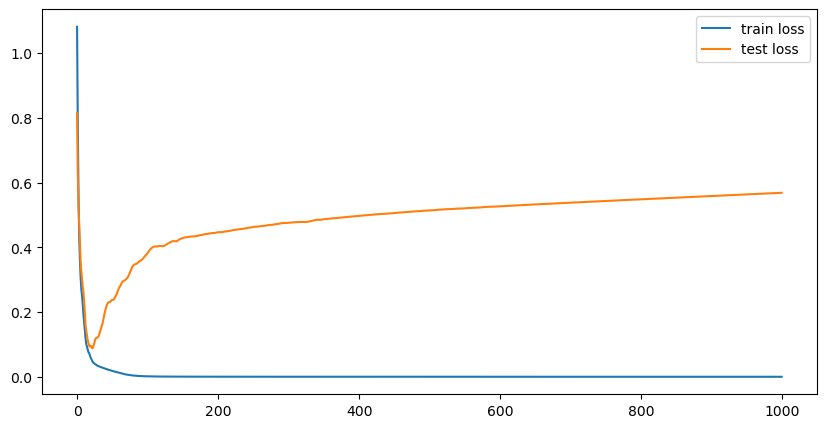

In [20]:
plt.figure(figsize=(10,5))

plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [26]:
predictions_train = []
predictions_test =  []

with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [63]:
# Get performance accuracy
def get_accuracy(y_predict, y_test):    
    _, predicted = torch.max(y_predict, 1)
    predicted = np.array(predicted)
    
    y_test = np.array(y_test)
    
    n_samples = y_predict.size(0)
    n_correct = np.count_nonzero(predicted == y_test)
        
    return n_correct / n_samples

In [67]:
print(f'Training accuracy: {get_accuracy(predictions_train, y_train)}')
print(f'Test accuracy: {get_accuracy(predictions_test, y_test)}')

Training accuracy: 1.0
Test accuracy: 0.9555555555555556
